# Postprocessing and Model Building

In [1]:
import os
import pickle
import json
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

In [2]:
main_filepath = '/projects/kernlab/akapoor/Demographic_Inference'

CONFIG_FILEPATH = f'{main_filepath}/experiment_config.json'
MODEL_CONFIG_FILEPATH = f'{main_filepath}/model_config.json'

with open(CONFIG_FILEPATH, 'r') as f:
   experiment_config = json.load(f)

with open(MODEL_CONFIG_FILEPATH, 'r') as f:
   model_config = json.load(f)


CWD = os.getcwd()

# Use double quotes for the dictionary keys inside the f-string
EXPERIMENT_DIRECTORY = f"{experiment_config['demographic_model']}_dadi_analysis_{experiment_config['dadi_analysis']}_moments_analysis_{experiment_config['moments_analysis']}_momentsLD_analysis_{experiment_config['momentsLD_analysis']}_seed_{experiment_config['seed']}"
EXPERIMENT_NAME = f'sims_pretrain_{experiment_config["num_sims_pretrain"]}_sims_inference_{experiment_config["num_sims_inference"]}_seed_{experiment_config["seed"]}_num_replicates_{experiment_config["k"]}_top_values_{experiment_config["top_values_k"]}'
SIM_DIRECTORY = f"{EXPERIMENT_DIRECTORY}/sims/{EXPERIMENT_NAME}"

# Check if hidden_size is a list, and if so, join the elements with "_"
hidden_size = model_config['neural_net_hyperparameters']['hidden_size']
if isinstance(hidden_size, list):
    hidden_size_str = "_".join(map(str, hidden_size))  # Join list elements with "_"
else:
    hidden_size_str = str(hidden_size)  # Convert integer to string if not a list

# Build the MODEL_DIRECTORY string
MODEL_DIRECTORY = (
    f"{EXPERIMENT_DIRECTORY}/models/{EXPERIMENT_NAME}/"
    f"num_hidden_neurons_{hidden_size_str}_"
    f"num_hidden_layers_{model_config['neural_net_hyperparameters']['num_layers']}_"
    f"num_epochs_{model_config['neural_net_hyperparameters']['num_epochs']}_"
    f"dropout_value_{model_config['neural_net_hyperparameters']['dropout_rate']}_"
    f"weight_decay_{model_config['neural_net_hyperparameters']['weight_decay']}_"
    f"batch_size_{model_config['neural_net_hyperparameters']['batch_size']}_"
    f"EarlyStopping_{model_config['neural_net_hyperparameters']['EarlyStopping']}"
)


In [3]:
os.chdir('/projects/kernlab/akapoor/Demographic_Inference/')
os.environ['PYTHONPATH'] = '/projects/kernlab/akapoor/Demographic_Inference:' + os.environ.get('PYTHONPATH', '')

Just to check again, I want to look at the results for preprocessing

In [4]:
with open(os.path.join('/projects/kernlab/akapoor/Demographic_Inference',f'{SIM_DIRECTORY}', 'preprocessing_results_obj.pkl'), 'rb') as f:
    preproc = pickle.load(f)

In [5]:
preproc['training']['indices'][0]

4227

In [6]:
preproc['training']['predictions']

,dadi_rep1_N0,moments_rep1_N0,moments_rep1_FIM_element_0,moments_rep1_FIM_element_1,moments_rep1_FIM_element_2,moments_rep1_FIM_element_3,moments_rep1_FIM_element_4,moments_rep1_FIM_element_5,dadi_rep1_Nb,moments_rep1_Nb,...,dadi_rep2_Nb,moments_rep2_Nb,dadi_rep2_N_recover,moments_rep2_N_recover,dadi_rep2_t_bottleneck_end,moments_rep2_t_bottleneck_end,momentsLD_N0,momentsLD_Nb,momentsLD_N_recover,momentsLD_t_bottleneck_end
0,8332.220122,8328.334400,0.633325,0.013137,1.070448,-0.030264,-1.376227,0.275692,3896.546320,3934.830907,...,3896.547032,3934.830895,6533.784581,6506.938990,1166.510710,1165.966816,8618.203588,5179.610469,7884.399528,359.156033
1,9735.511851,9731.170513,-0.312813,0.994429,0.070430,-0.334302,0.374891,0.219778,4226.257100,4284.903351,...,4226.257100,4284.164826,7172.300522,7123.716788,1000.497213,1011.144317,9857.951497,4957.721486,7804.935477,331.207232
2,8683.031259,8683.820747,0.785296,-0.880350,0.601306,0.463157,-0.330648,0.596905,4506.197872,4624.538194,...,4517.347735,4624.420229,6851.459401,6745.231493,760.705641,816.756395,9461.497408,7763.597920,5719.743207,606.714474
3,8785.589683,8778.802999,-0.702818,-1.309839,-1.338795,1.422382,-0.091657,-1.073644,4192.058554,4242.179411,...,4192.075138,4241.946873,7369.535088,7239.913368,527.134934,526.726016,8505.950255,5846.210562,6260.880364,172.329038
4,8951.790406,8948.805914,0.790385,0.518531,0.938689,-1.021171,-0.381558,0.844293,5011.151265,5069.061283,...,5009.360539,5060.070677,6183.008825,6163.741373,1174.594708,1196.034103,9212.108102,2639.073710,6261.081085,1373.128792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8024.092313,8015.847400,0.278570,-1.352652,-0.025914,1.387708,-1.508798,-0.434497,4195.132737,4223.058845,...,4195.130296,4223.051390,7221.683389,7214.257214,715.974152,687.811413,8321.465155,4761.849721,8389.457940,416.848098
3996,8084.872121,8083.078998,0.483476,-1.335489,0.152950,1.218017,-1.178714,0.367737,4305.755711,4355.796337,...,4306.858168,4355.797636,7015.551604,6895.114698,673.616643,696.990648,8151.603863,5493.873245,8345.849693,394.557270
3997,9268.811540,9264.042337,-0.961258,0.368297,-0.916342,0.263615,0.862351,0.146386,3896.065457,3954.578476,...,3896.056709,3954.578476,6684.523731,6601.425337,702.123212,715.043693,8862.688041,14572.601795,5889.782364,2527.028778
3998,9340.738048,9335.727717,0.333460,1.346261,0.855989,-1.451560,-0.267828,0.613026,4513.222972,4549.954936,...,4513.151829,4549.954936,6342.603691,6327.559142,1307.705712,1307.001880,9145.434599,3462.783982,6725.514322,989.839683


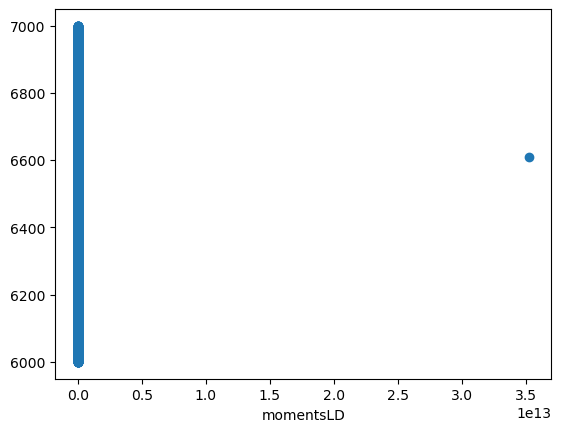

In [65]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(preproc['training']['predictions']['momentsLD_N_recover'], preproc['training']['targets']['simulated_params_N_recover'])
plt.xlabel("momentsLD")
plt.show()

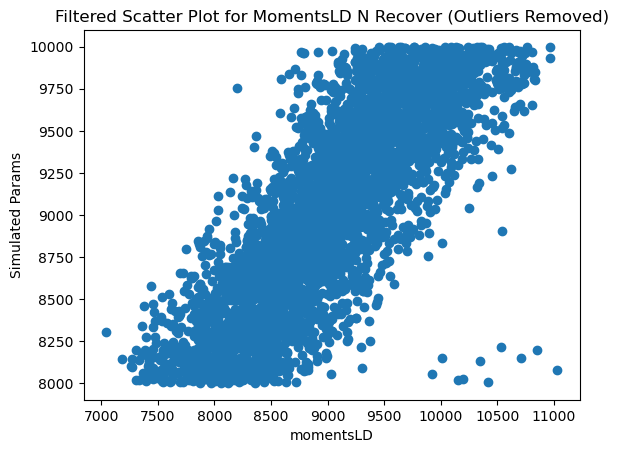

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Extract predictions and targets
predictions = preproc['training']['predictions']['momentsLD_N0']
targets = preproc['training']['targets']['simulated_params_N0']

# Combine predictions and targets into a single DataFrame for filtering
import pandas as pd
data = pd.DataFrame({"predictions": predictions, "targets": targets})

# Define a function to filter outliers using the IQR method
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Remove outliers from predictions and targets
data = remove_outliers_iqr(data, "predictions")
data = remove_outliers_iqr(data, "targets")

# Plot the filtered data
plt.figure()
plt.scatter(data['predictions'], data['targets'])
plt.xlabel("momentsLD")
plt.ylabel("Simulated Params")
plt.title("Filtered Scatter Plot for MomentsLD N Recover (Outliers Removed)")
plt.show()


In [67]:
np.median(preproc['training']['predictions']['momentsLD_N_recover'])

6668.135615849471

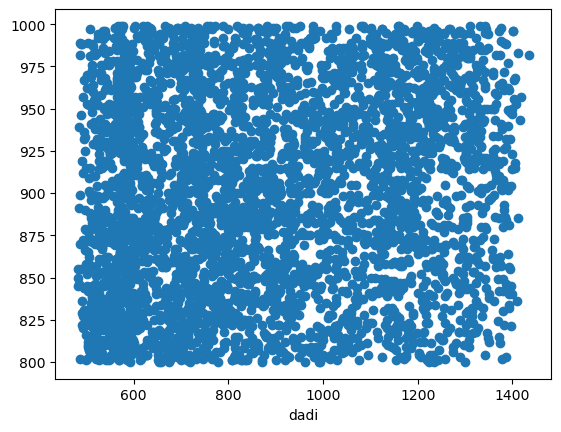

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(preproc['training']['predictions']['dadi_rep1_t_bottleneck_end'], preproc['training']['targets']['simulated_params_t_bottleneck_end'])
plt.xlabel("dadi")
plt.show()

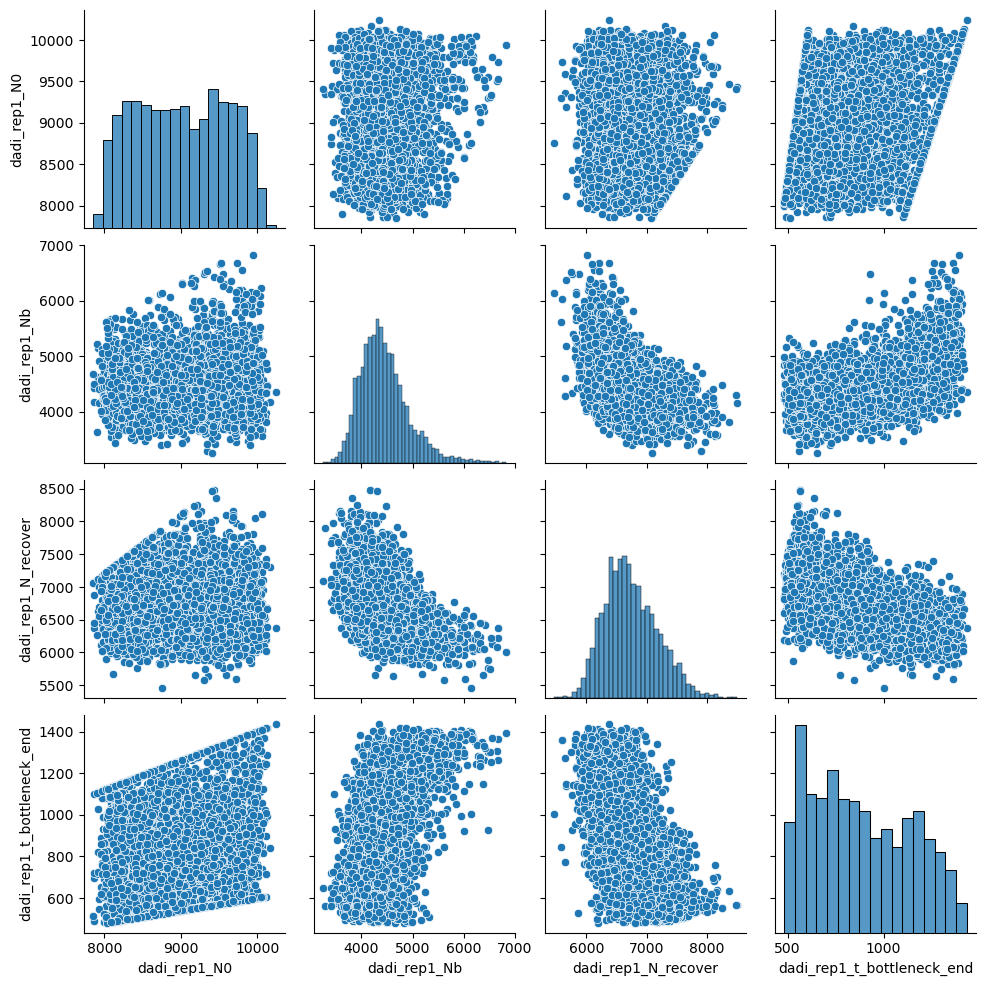

In [11]:
import seaborn as sns
import pandas as pd

# Select the columns for pairplot from the DataFrame
data = preproc['training']['predictions'][['dadi_rep1_N0', 'dadi_rep1_Nb', 'dadi_rep1_N_recover', 'dadi_rep1_t_bottleneck_end']]

# Ensure the input data is a DataFrame (sanity check)
if not isinstance(data, pd.DataFrame):
    raise ValueError("Input to sns.pairplot must be a DataFrame.")

# Create the pairplot
sns.pairplot(data)


In [12]:
import pandas as pd

# Count rows with at least one NaN
rows_with_nan = preproc['training']['predictions'].isna().any(axis=1).sum()
print(f"Number of rows with at least one NaN: {rows_with_nan}")


Number of rows with at least one NaN: 0


In [13]:
import pandas as pd

# Assuming preproc['training']['predictions'] is a DataFrame
predictions_df = preproc['training']['predictions']

# Count rows with at least one NaN value
rows_with_nan = predictions_df.isna().any(axis=1).sum()

print(f"Number of rows with at least one NaN value: {rows_with_nan}")


Number of rows with at least one NaN value: 0


In [14]:
preproc['training']['predictions']['moments_rep1_N0']

0       8328.334400
1       9731.170513
2       8683.820747
3       8778.802999
4       8948.805914
           ...     
3995    8015.847400
3996    8083.078998
3997    9264.042337
3998    9335.727717
3999    9334.574117
Name: moments_rep1_N0, Length: 4000, dtype: float64

In [15]:
np.max(preproc['training']['targets']['simulated_params_N0'])

9999

In [16]:
np.min(preproc['training']['targets']['simulated_params_N0'])

8000

In [17]:
preproc['training']['targets']['simulated_params_N0']

0       8320
1       9673
2       8660
3       8746
4       8888
        ... 
3995    8020
3996    8133
3997    9278
3998    9303
3999    9375
Name: simulated_params_N0, Length: 4000, dtype: int64

In [18]:
preproc['training']['predictions']['dadi_rep1_N0']

0       8332.220122
1       9735.511851
2       8683.031259
3       8785.589683
4       8951.790406
           ...     
3995    8024.092313
3996    8084.872121
3997    9268.811540
3998    9340.738048
3999    9339.530233
Name: dadi_rep1_N0, Length: 4000, dtype: float64

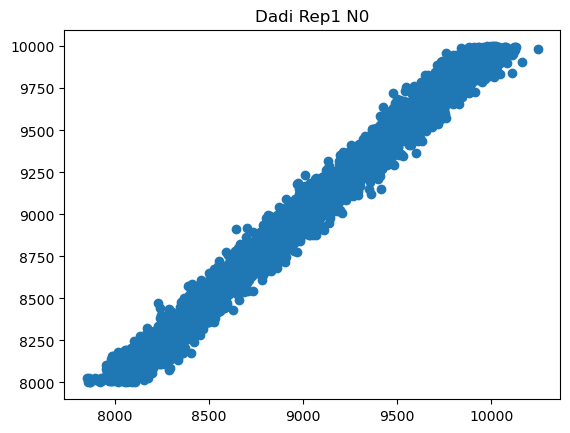

In [52]:
import matplotlib.pyplot as plt
plt.title("Dadi Rep1 N0")
plt.scatter(preproc['training']['predictions']['dadi_rep1_N0'], preproc['training']['targets']['simulated_params_N0'])
plt.show()

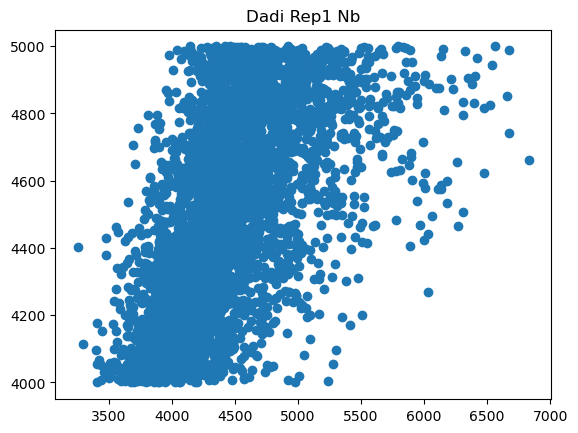

In [53]:
import matplotlib.pyplot as plt
plt.title("Dadi Rep1 Nb")
plt.scatter(preproc['training']['predictions']['dadi_rep1_Nb'], preproc['training']['targets']['simulated_params_Nb'])
plt.show()

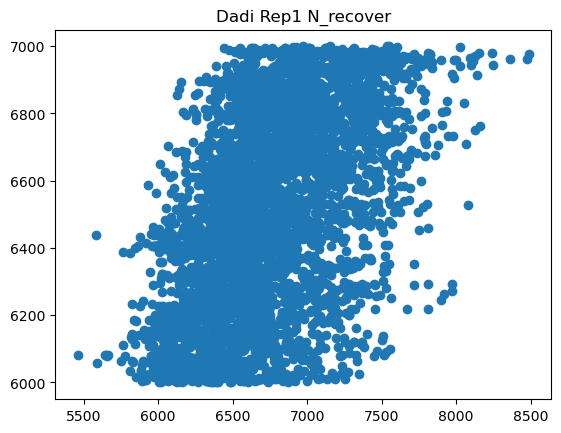

In [54]:
import matplotlib.pyplot as plt
plt.title("Dadi Rep1 N_recover")
plt.scatter(preproc['training']['predictions']['dadi_rep1_N_recover'], preproc['training']['targets']['simulated_params_N_recover'])
plt.show()

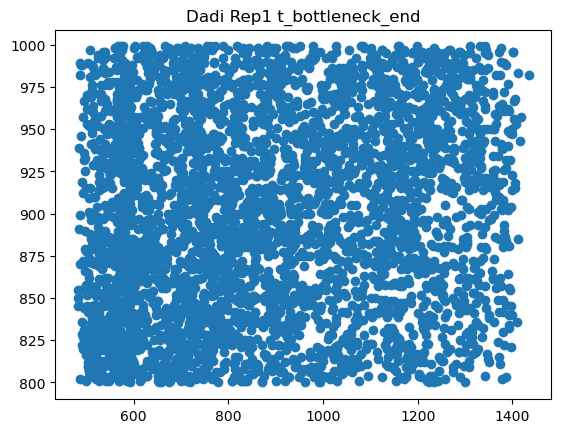

In [55]:
import matplotlib.pyplot as plt
plt.title("Dadi Rep1 t_bottleneck_end")
plt.scatter(preproc['training']['predictions']['dadi_rep1_t_bottleneck_end'], preproc['training']['targets']['simulated_params_t_bottleneck_end'])
plt.show()

In [20]:
with open('/projects/kernlab/akapoor/Demographic_Inference/moments_dadi_features/software_inferences_sim_810.pkl', 'rb') as f:
    a = pickle.load(f)

In [21]:
a['simulated_params']

{'N0': 8636,
 'Nb': 4680,
 'N_recover': 6822,
 't_bottleneck_start': 1935,
 't_bottleneck_end': 869}

In [22]:
a['opt_params_dadi']

[{'N0': 8625.835012939711,
  'Nb': 4836.425427712205,
  'N_recover': 6663.14532109629,
  't_bottleneck_end': 959.5353320655287,
  'll': -236.43233561890156},
 {'N0': 8625.861555748212,
  'Nb': 4836.29389160859,
  'N_recover': 6663.239534629827,
  't_bottleneck_end': 959.6415726776778,
  'll': -236.43234515303084}]

## Postprocessing

In [23]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/postprocessing.py \
    --config_file $CONFIG_FILEPATH \
    --training_features_filepath $SIM_DIRECTORY/training_features.csv \
    --training_targets_filepath $SIM_DIRECTORY/training_targets.csv \
    --validation_features_filepath $SIM_DIRECTORY/validation_features.csv \
    --validation_targets_filepath $SIM_DIRECTORY/validation_targets.csv \
    --sim_directory $SIM_DIRECTORY



Processing training data:
===> Normalizing the data.

Processing validation data:
===> Normalizing the data.
Postprocessing dict keys: dict_keys(['normalization', 'predictions', 'normalized_predictions', 'targets', 'normalized_targets'])
Postprocessing complete!


In [24]:
with open(os.path.join('/projects/kernlab/akapoor/Demographic_Inference',f'{SIM_DIRECTORY}', 'postprocessing_results.pkl'), 'rb') as f:
    post = pickle.load(f)

In [25]:
post['training']['normalized_predictions']['dadi_rep1_t_bottleneck_end']

0       4.616103
1       1.740663
2      -2.626260
3      -6.458205
4       4.773928
          ...   
3995   -3.187464
3996   -3.921154
3997   -3.427263
3998    7.061629
3999    6.125171
Name: dadi_rep1_t_bottleneck_end, Length: 4000, dtype: float64

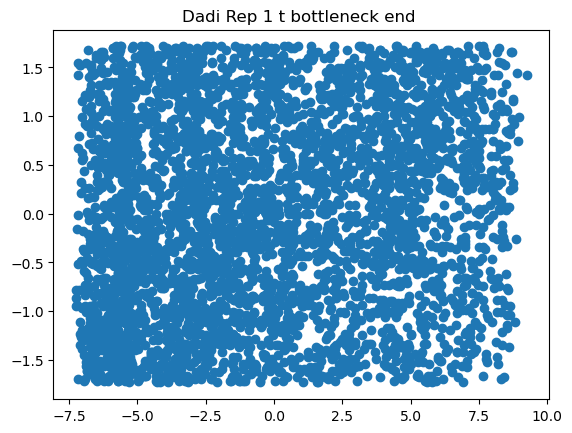

In [26]:
plt.figure()
plt.title("Dadi Rep 1 t bottleneck end ")
plt.scatter(post['training']['normalized_predictions']['dadi_rep1_t_bottleneck_end'], post['training']['normalized_targets']['simulated_params_t_bottleneck_end'])
plt.show()

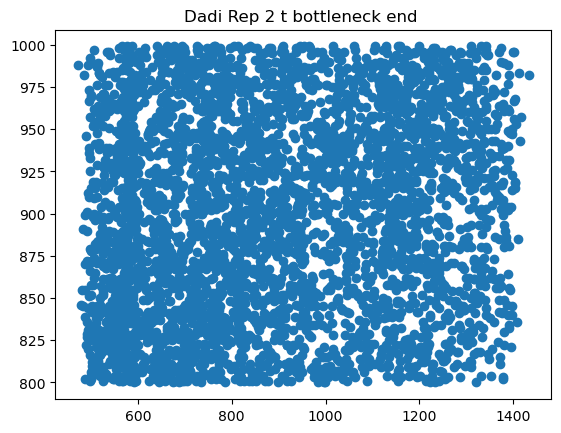

In [50]:
plt.figure()
plt.title("Dadi Rep 2 t bottleneck end ")
plt.scatter(post['training']['predictions']['moments_rep2_t_bottleneck_end'], post['training']['targets']['simulated_params_t_bottleneck_end'])
plt.show()

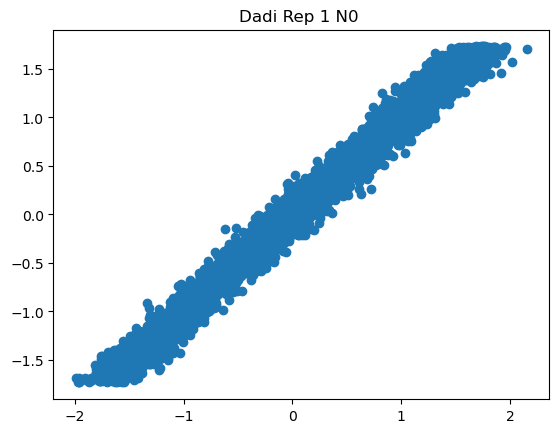

In [28]:
plt.figure()
plt.title("Dadi Rep 1 N0 ")
plt.scatter(post['training']['normalized_predictions']['dadi_rep1_N0'], post['training']['normalized_targets']['simulated_params_N0'])
plt.show()

## Calculate the MSE for each analysis type and for each stage.

In [30]:
post['training']['normalized_predictions']

,dadi_rep1_N0,moments_rep1_N0,moments_rep1_FIM_element_0,moments_rep1_FIM_element_1,moments_rep1_FIM_element_2,moments_rep1_FIM_element_3,moments_rep1_FIM_element_4,moments_rep1_FIM_element_5,dadi_rep1_Nb,moments_rep1_Nb,...,dadi_rep2_Nb,moments_rep2_Nb,dadi_rep2_N_recover,moments_rep2_N_recover,dadi_rep2_t_bottleneck_end,moments_rep2_t_bottleneck_end,momentsLD_N0,momentsLD_Nb,momentsLD_N_recover,momentsLD_t_bottleneck_end
0,-1.156629,-1.163359,0.633325,0.013137,1.070448,-0.030264,-1.376227,0.275692,-2.090425,-1.957803,...,-2.090422,-1.957803,0.117033,0.024037,4.616101,4.606680,-0.661291,2.354240,4.795701,-9.367692
1,1.273944,1.266424,-0.312813,0.994429,0.070430,-0.334302,0.374891,0.219778,-0.948273,-0.745117,...,-0.948273,-0.747675,2.328917,2.160618,1.740663,1.925076,1.486016,1.585594,4.520429,-9.851780
2,-0.549006,-0.547639,0.785296,-0.880350,0.601306,0.463157,-0.330648,0.596905,0.021470,0.431413,...,0.060094,0.431004,1.217491,0.849507,-2.412649,-1.441822,0.799337,11.305435,-2.702889,-5.079854
3,-0.371370,-0.383124,-0.702818,-1.309839,-1.338795,1.422382,-0.091657,-1.073644,-1.066740,-0.893117,...,-1.066683,-0.893922,3.012158,2.563135,-6.458212,-6.465295,-0.855719,4.663410,-0.828335,-12.603631
4,-0.083501,-0.088671,0.790385,0.518531,0.938689,-1.021171,-0.381558,0.844293,1.770680,1.971286,...,1.764477,1.940142,-1.098090,-1.164834,4.756120,5.127461,0.367382,-6.446438,-0.827639,8.194831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1.690322,-1.704602,0.278570,-1.352652,-0.025914,1.387708,-1.508798,-0.434497,-1.056091,-0.959352,...,-1.056100,-0.959378,2.499985,2.474260,-3.187421,-3.675214,-1.175257,0.907074,6.545274,-8.368436
3996,-1.585048,-1.588154,0.483476,-1.335489,0.152950,1.218017,-1.178714,0.367737,-0.672882,-0.499536,...,-0.669063,-0.499532,1.785923,1.368717,-3.921075,-3.516225,-1.469465,3.442878,6.394211,-8.754525
3997,0.465595,0.457335,-0.961258,0.368297,-0.916342,0.263615,0.862351,0.146386,-2.092091,-1.889396,...,-2.092121,-1.889396,0.639209,0.351348,-3.427327,-3.203537,-0.237831,34.892516,-2.113856,28.180965
3998,0.590176,0.581497,0.333460,1.346261,0.855989,-1.451560,-0.267828,0.613026,0.045806,0.173049,...,0.045559,0.173049,-0.545237,-0.597353,7.061670,7.049479,0.251900,-3.593022,0.781205,1.556069


In [31]:
post['training']['normalized_predictions']['dadi_rep1_N0']

0      -1.156629
1       1.273944
2      -0.549006
3      -0.371370
4      -0.083501
          ...   
3995   -1.690322
3996   -1.585048
3997    0.465595
3998    0.590176
3999    0.588084
Name: dadi_rep1_N0, Length: 4000, dtype: float64

In [32]:
mean_squared_error(post['training']['normalized_predictions']['dadi_rep1_N0'], post['training']['normalized_targets']['simulated_params_N0'])

0.016217162734803618

In [33]:
np.min(post['training']['normalized_predictions']['dadi_rep1_N0'])

-1.9895573362790475

In [34]:
mean_squared_error(post['training']['normalized_predictions']['dadi_rep1_Nb'], post['training']['normalized_targets']['simulated_params_Nb'])

1.8786598554324179

In [35]:
np.max(post['training']['normalized_predictions']['dadi_rep1_Nb'])

8.067030435537289

In [36]:
post['training']['normalized_targets']['simulated_params_Nb']

0       0.103923
1       1.427210
2       1.368320
3       0.360267
4       0.862561
          ...   
3995   -0.460726
3996   -1.326751
3997   -0.173205
3998   -0.374123
3999    1.538061
Name: simulated_params_Nb, Length: 4000, dtype: float64

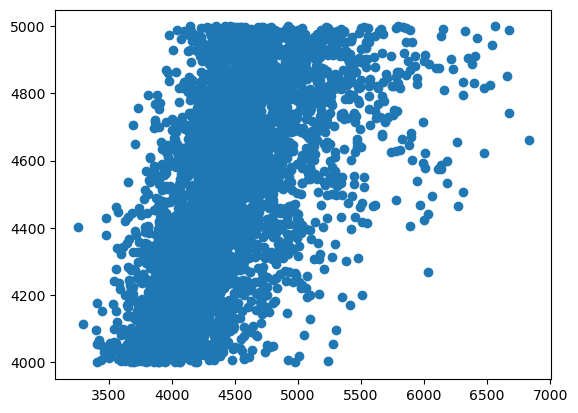

In [37]:
import matplotlib.pyplot as plt
plt.scatter(preproc['training']['predictions']['dadi_rep1_Nb'], preproc['training']['targets']['simulated_params_Nb'])

In [38]:
def plot_mse_and_sem(mse_results, sem_results, title, parameters):
    """
    Create a grouped bar plot showing MSE values with error bars for each parameter and analysis type.
    
    Parameters:
    -----------
    mse_results : dict
        Dictionary containing MSE values for each analysis type and parameter
    sem_results : dict
        Dictionary containing SEM values for each analysis type and parameter
    title : str
        Title for the plot
    parameters : list
        List of parameter names to plot
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create figure and axis with clean style
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Number of parameter groups and analysis types
    n_parameters = len(parameters)
    n_analyses = len(mse_results.keys())
    
    # Width of each bar and positions of the bars
    bar_width = 0.25
    index = np.arange(n_parameters)
    
    # Colors for different analysis types - using more distinct colors
    colors = ['#2ecc71', '#3498db', '#e74c3c']  # green, blue, red
    
    # Plot bars for each analysis type
    for i, (analysis_type, color) in enumerate(zip(mse_results.keys(), colors)):
        mse_values = []
        sem_values = []
        for param in parameters:
            mse_values.append(mse_results[analysis_type].get(param, 0))
            sem_values.append(sem_results[analysis_type].get(param, 0))
        
        positions = index + (i - 1) * bar_width
        bars = ax.bar(positions, mse_values, bar_width,
                     label=analysis_type, color=color, alpha=0.8)
        
        # Add error bars
        ax.errorbar(positions, mse_values, yerr=sem_values,
                   fmt='none', color='black', capsize=5)
    
    # Customize the plot
    ax.set_ylabel('Mean Squared Error (MSE)', fontsize=10)
    ax.set_title(title, fontsize=12, pad=20)
    ax.set_xticks(index)
    ax.set_xticklabels(parameters, fontsize=10)
    
    # Add legend with better positioning
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # Add grid with light color
    ax.yaxis.grid(True, linestyle='--', alpha=0.3, color='gray')
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return fig

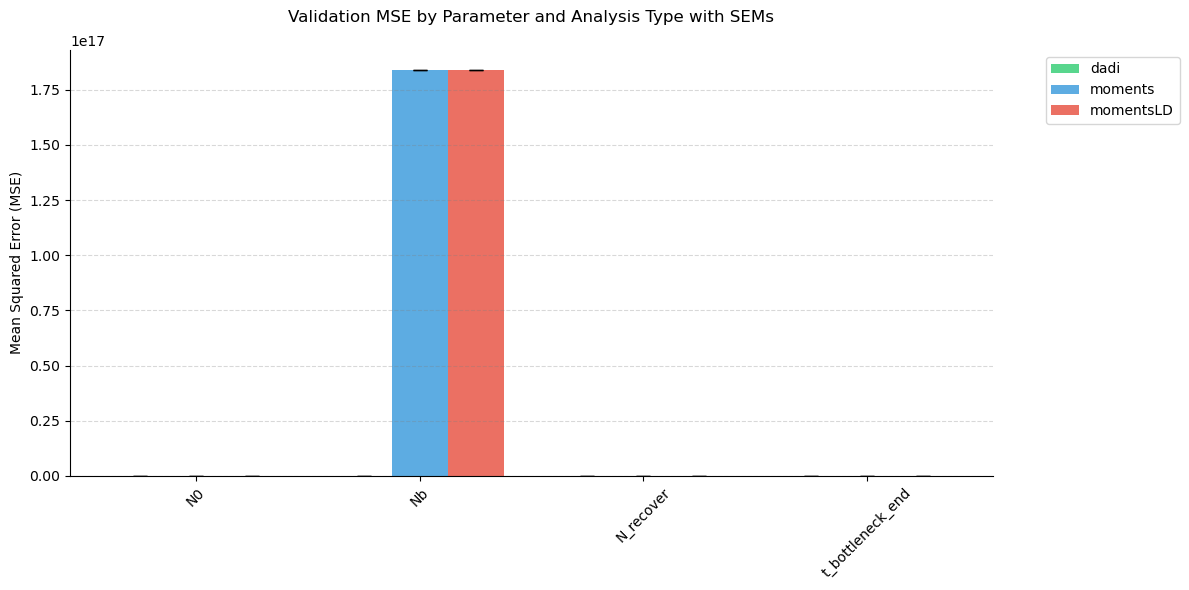

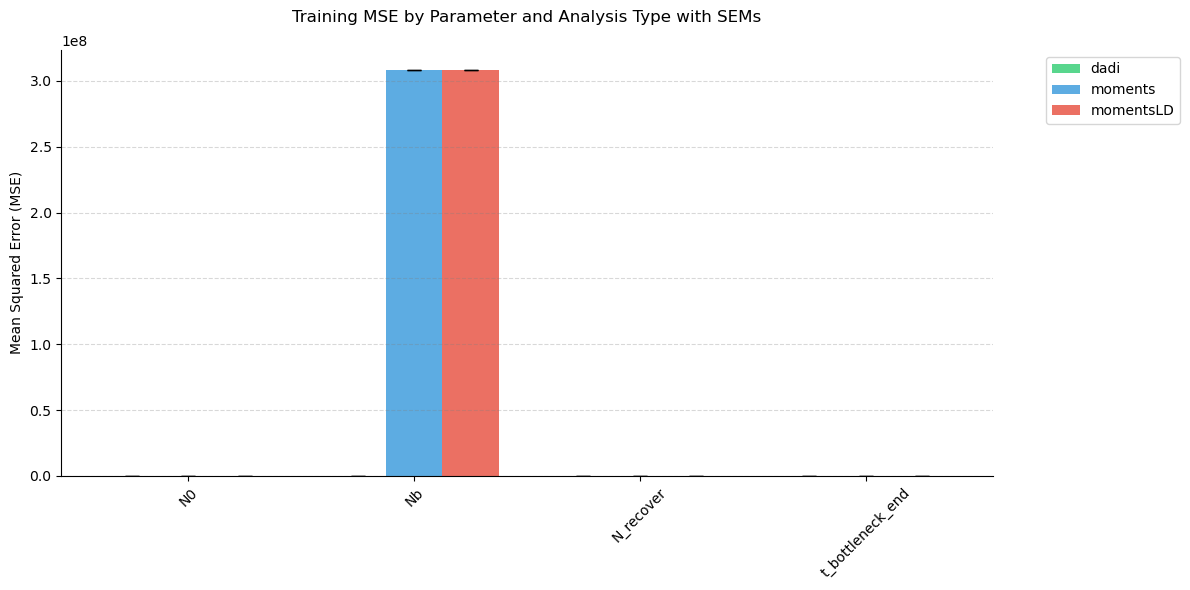

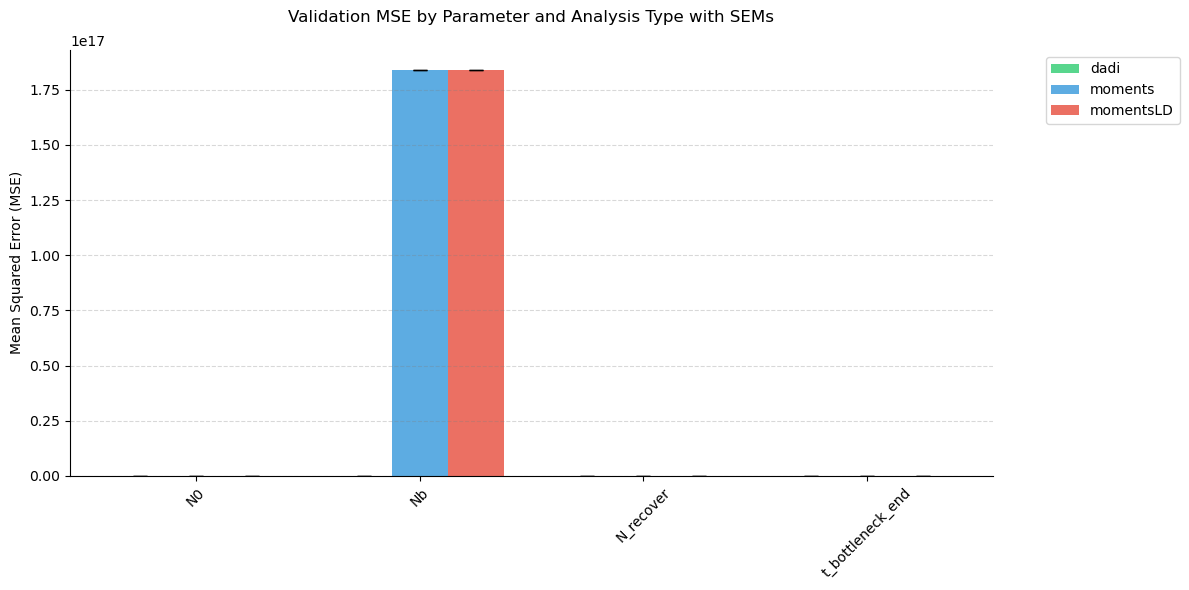

In [39]:
# Updated function to handle underscores in parameter names correctly
def calculate_mse_and_sem(post, key):
    predictions = post[key]['normalized_predictions']
    targets = post[key]['normalized_targets']
    mse_results = {}
    sem_results = {}

    for analysis_type in ['dadi', 'moments', 'momentsLD']:
        mse_values = {}
        sem_values = {}
        for column in predictions.columns:
            if column.startswith(analysis_type):
                # Extract parameter name after the last '_'
                param_name = "_".join(column.split('_')[-2:]) if 't_split' in column else column.split('_')[-1]
                target_column = f"simulated_params_{param_name}"
                if target_column in targets.columns:
                    mse = mean_squared_error(targets[target_column], predictions[column])
                    mse_values[param_name] = mse
                    sem = np.std(targets[target_column] - predictions[column]) / np.sqrt(len(targets[target_column]))
                    sem_values[param_name] = sem
        if mse_values:
            mse_results[analysis_type] = mse_values
            sem_results[analysis_type] = sem_values
    return mse_results, sem_results

# Parameters list
# parameters = ['Na', 'N1', 'N2', "t_split"]
parameters = experiment_config['parameters_to_estimate']

# Recalculate MSE and SEM for training and validation with the updated function
training_mse, training_sem = calculate_mse_and_sem(post, 'training')
validation_mse, validation_sem = calculate_mse_and_sem(post, 'validation')

# Re-plot with the fixed parameter handling
plot_mse_and_sem(training_mse, training_sem, "Training MSE by Parameter and Analysis Type with SEMs", parameters)
plot_mse_and_sem(validation_mse, validation_sem, "Validation MSE by Parameter and Analysis Type with SEMs", parameters)

In [40]:
training_mse

{'dadi': {'N0': 0.016214304782781908, 'Nb': 1.8654618850752627},
 'moments': {'N0': 68.90109253684578, 'Nb': 308292074.65493345},
 'momentsLD': {'N0': 68.90109253684578, 'Nb': 308292074.65493345}}

In [41]:
validation_mse

{'dadi': {'N0': 0.01610100689796418, 'Nb': 1.9783192228174216},
 'moments': {'N0': 152.2146763862601, 'Nb': 1.8389841749703555e+17},
 'momentsLD': {'N0': 152.2146763862601, 'Nb': 1.8389841749703555e+17}}

In [42]:
post['training']['predictions'].columns

Index(['dadi_rep1_N0', 'moments_rep1_N0', 'moments_rep1_FIM_element_0',
       'moments_rep1_FIM_element_1', 'moments_rep1_FIM_element_2',
       'moments_rep1_FIM_element_3', 'moments_rep1_FIM_element_4',
       'moments_rep1_FIM_element_5', 'dadi_rep1_Nb', 'moments_rep1_Nb',
       'dadi_rep1_N_recover', 'moments_rep1_N_recover',
       'dadi_rep1_t_bottleneck_end', 'moments_rep1_t_bottleneck_end',
       'dadi_rep2_N0', 'moments_rep2_N0', 'moments_rep2_FIM_element_0',
       'moments_rep2_FIM_element_1', 'moments_rep2_FIM_element_2',
       'moments_rep2_FIM_element_3', 'moments_rep2_FIM_element_4',
       'moments_rep2_FIM_element_5', 'dadi_rep2_Nb', 'moments_rep2_Nb',
       'dadi_rep2_N_recover', 'moments_rep2_N_recover',
       'dadi_rep2_t_bottleneck_end', 'moments_rep2_t_bottleneck_end',
       'momentsLD_N0', 'momentsLD_Nb', 'momentsLD_N_recover',
       'momentsLD_t_bottleneck_end'],
      dtype='object')

## Extracting Features

In [43]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/extracting_features.py \
 --postprocessing_results_filepath $SIM_DIRECTORY/postprocessing_results.pkl \
 --sim_directory $SIM_DIRECTORY

dict_keys(['parameter_names', 'target_names', 'training', 'validation'])
Training features shape: (4000, 32)
Validation features shape: (1000, 32)
Training targets shape: (4000, 4)
Validation targets shape: (1000, 4)


## Linear Evaluation

In [44]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type standard

Model directory created/verified: bottleneck_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False
Initializing LinearRegression with kwargs={}
PREDICTIONS SHAPE TRAINING: (4000, 4)
[0.73627889 1.74761083 0.21991065 ... 0.78276989 0.25603403 0.23191013]
[1.11217656e+00 1.04690906e-01 1.60673019e+00 9.14077795e-02
 1.50092886e-01 3.31690838e-01 3.92428801e-02 5.79131327e-02
 5.95464997e-02 6.80304542e-01 7.89691178e-01 7.51500521e-01
 7.19812253e-03 1.62346633e-01 1.23726902e-01 1.74134796e-01
 1.44157821e+00 1.30066091e-01 3.34561191e-01 5.08923900e-01
 2.23148032e-01 3.01132327e-02 1.50317329e-01 5.20351288e-01
 3.68726747e-01 1.00503796e-01 2.29685942e-01 1.28761173e-01
 1.00405093e-01 2.88816552e-01 2.50146666e-01 7.92700497e-01
 1.14697436e+00 8.16460516e-01

### Ridge

In [ ]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type ridge

### Lasso

In [63]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type lasso

Model directory created/verified: bottleneck_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False
/gpfs/home/akapoor/miniforge3/envs/snakemake-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.643e+02, tolerance: 3.220e-01
  model = cd_fast.enet_coordinate_descent(
/gpfs/home/akapoor/miniforge3/envs/snakemake-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

### Elastic Net

In [ ]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type elasticnet

## Random Forest

In [45]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/random_forest_evaluation.py \
    --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
    --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
    --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
    --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
    --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json

Model directory created/verified: bottleneck_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False

No hyperparameters specified. Running RandomizedSearchCV to find best hyperparameters...

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best hyperparameters found via RandomizedSearchCV: {'random_state': 123, 'n_estimators': 300, 'min_samples_split': 10, 'max_depth': None}

Initializing RandomForestRegressor with kwargs={'n_estimators': 300, 'max_depth': None, 'random_state': 123, 'min_samples_split': 10}

Random Forest predictions shape (training): (4000, 4)
Random Forest predictions shape (validation): (1000, 4)

[0.26433813 0.3195455  0.04086566 ... 0.21216521 0.04624642 0.04891259]
[0.91403797 0.12901438 1.86490118 0.14747153 0.06528244 0.63464

## XGBoost

In [46]:
 !python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/xgboost_evaluation.py \
    --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
    --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
    --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
    --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
    --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json

Model directory created/verified: bottleneck_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False

No XGBoost hyperparameters specified. Running RandomizedSearchCV to find best hyperparameters...

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best hyperparameters found via RandomizedSearchCV: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

Initializing XGBRegressor with kwargs={'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0, 'min_child_weight': 5, 'reg_lambda': 1, 'reg_alpha': 0}

XGBoost predictions shape (training): (4000, 4)
XGBoost predictions shape (validation): (1000, 4)

[0

## Neural Network

In [ ]:
    # parser.add_argument("--experiment_directory", type=str, required=True)
    # parser.add_argument("--model_config_file", type=str, required=True)
    # parser.add_argument("--features_file", type=str, required=True)
    # parser.add_argument("--color_shades", type=str, required=True)
    # parser.add_argument("--main_colors", type=str, required=True)

In [ ]:
preproc['training']['predictions']

In [ ]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/setup_trainer.py \
    --experiment_directory $EXPERIMENT_DIRECTORY \
    --model_config_file $MODEL_CONFIG_FILEPATH \
    --features_file $SIM_DIRECTORY/features_and_targets.pkl \
    --color_shades $SIM_DIRECTORY/color_shades.pkl \
    --main_colors $SIM_DIRECTORY/main_colors.pkl

In [ ]:
preproc['training']['predictions'].columns

In [ ]:
import torch
print("Is CUDA available?", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("Current GPU:", torch.cuda.current_device())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")